# YOLO

YOLO is one of the most popular segmentation algorithms, and today offers multiple modes of analysis (object detection, segmentation etc.) It is also fairly easy to re-train for specific applications and offered on various platforms. Additionally it is possible to run the software on CPU, which makes it usable on regular computers.

## Installation

First we need to make sure the necessary code is installed. We recommend to create a separate environment to avoid any incompatibilities e.g.:
```
conda create -n yoloenv python=3.12 jupyterlab
```

and then:

```
pip install ultralytics
```

In [1]:
# run this only on Colab where the package needs to be reinstalled for every session
# %pip install ultralytics

Once installed we can verify that the software works as expected:

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.28 🚀 Python-3.12.7 torch-2.5.1 CPU (Apple M2 Pro)
Setup complete ✅ (12 CPUs, 32.0 GB RAM, 826.5/926.4 GB disk)


## Applications

YOLO can be used for multiple detection modes. For each mode, you have to use a different model. Here is the step where we download the weights of the model i.e. the  values of all small filters and other parameters specific to a trained version of a model.

### Instance Segmentation

Instance segmentation allows to detect multiple objects in an image (see [here](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml) the list of objects), i.e. even if we have muliple times the same object we should be able to id all of them. Let's download the model:

In [2]:
from ultralytics import YOLO
model_seg = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model. Loads the model with the specific weights.

Now we can run the model directly an an image we have on disk. In fact we can run directly on as many images as necessary:

In [3]:
output = model_seg.predict(['data/woody_bulle.JPG', 'data/cat_crop.png'])  # predict on an image


0: 640x640 2 cats, 88.7ms
1: 640x640 1 cat, 88.7ms
Speed: 6.9ms preprocess, 88.7ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


The ```output``` variable is a complex structure that contains a lot of information such as the masks themselves, but also bounding boxes, detection confidence etc. As we processed to images we have a list. Let's look at the results for the first image. First we can display the output:

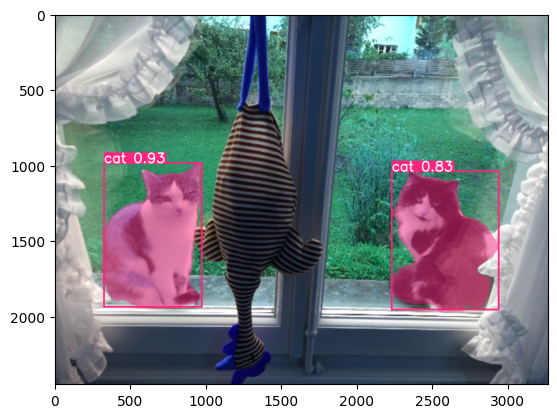

In [4]:
import matplotlib.pyplot as plt
plt.imshow(output[0].plot()); # You get from YOLO the mask, the bounding box and the class.

We see here a summary of the result, including the masks, boxes and probabilities. We can also access these variables separately. For example the masks. We see here that we get one mask per object:

In [5]:
output[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [6]:
# Zeigt an, dass es 2 Bilder mit den Massen 640x640 gibt
output[0].masks.data.shape

torch.Size([2, 640, 640])

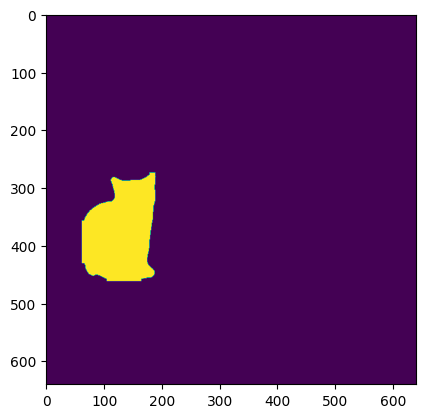

In [7]:
plt.imshow(output[0].masks.data[0,:,:]);

We also get the outline of the objects:

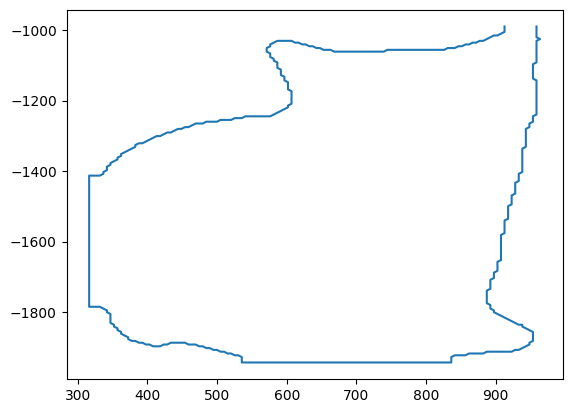

In [8]:
plt.plot(output[0].masks.xy[0][:,0], -output[0].masks.xy[0][:,1])

### Pose estimation

Another type of model allows to detect the pose of people (similarly to what has been shown in the movement module). Let's download again the appropriate weights:

In [9]:
from ultralytics import YOLO

model_pose = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model

Now we segment an image of a valient country skier:

In [10]:
output_ski = model_pose.predict('https://raw.githubusercontent.com/guiwitz/MLCV/main/supp_data/ski.jpg')  # predict on an image


Found https://raw.githubusercontent.com/guiwitz/MLCV/main/supp_data/ski.jpg locally at ski.jpg
image 1/1 /Users/vibe/Documents/GitHub/CAS_AICP_M4/ski.jpg: 640x384 1 person, 29.2ms
Speed: 1.7ms preprocess, 29.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


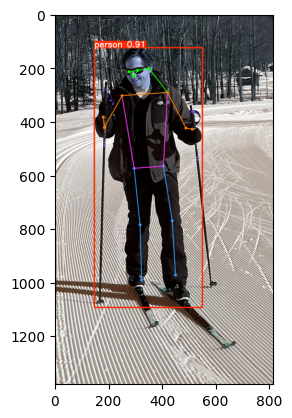

In [11]:
plt.imshow(output_ski[0].plot());

Again, we can recover the detailed information such as the pose keypoints (the order is: 0: Nose 1: Left Eye 2: Right Eye 3: Left Ear 4: Right Ear 5: Left Shoulder 6: Right Shoulder 7: Left Elbow 8: Right Elbow 9: Left Wrist 10: Right Wrist 11: Left Hip 12: Right Hip 13: Left Knee 14: Right Knee 15: Left Ankle 16: Right Ankle):

In [12]:
output_ski[0].keypoints

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9944, 0.9913, 0.9502, 0.9590, 0.4008, 0.9987, 0.9970, 0.9920, 0.9724, 0.9857, 0.9610, 0.9998, 0.9997, 0.9996, 0.9994, 0.9962, 0.9956]])
data: tensor([[[2.9244e+02, 2.3293e+02, 9.9442e-01],
         [3.0737e+02, 2.1099e+02, 9.9127e-01],
         [2.7534e+02, 2.1522e+02, 9.5022e-01],
         [3.4981e+02, 2.0260e+02, 9.5899e-01],
         [0.0000e+00, 0.0000e+00, 4.0079e-01],
         [4.1880e+02, 2.9213e+02, 9.9870e-01],
         [2.4921e+02, 3.0437e+02, 9.9700e-01],
         [4.8739e+02, 4.2571e+02, 9.9199e-01],
         [1.8323e+02, 4.2379e+02, 9.7239e-01],
         [5.1051e+02, 4.2935e+02, 9.8568e-01],
         [1.7963e+02, 3.8455e+02, 9.6101e-01],
         [4.0380e+02, 5.6793e+02, 9.9982e-01],
         [2.9483e+02, 5.7596e+02, 9.9970e-01],
         [4.3691e+02, 7.7174e+02, 9.9961e-01],
         [3.1634e+02, 7.8663e+02, 9.9942e-01],
         [4.4824e+02, 9.7345e+02, 9.9623e-01],
         [3.2248e+02, 9.922

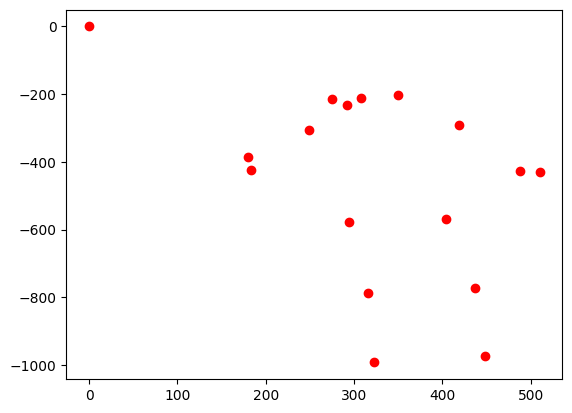

In [13]:
fig, ax = plt.subplots()
ax.plot(output_ski[0].keypoints.xy[0][:,0], -output_ski[0].keypoints.xy[0][:,1], 'ro');

## Tracking

Finally, the different modes described above can also be used in video format by applying the methods to each time frame and then tracking objects. For example we can apply pose estimation to a violinist, directly from a YouTube video:

In [ ]:
results = model_pose.track("https://youtu.be/Pr_gK9fzwSo?si=8n6YMhrbovzyXvKP&t=50", show=True)

In [14]:
#results = model_pose.track("https://youtu.be/Pr_gK9fzwSo?si=FNKS_d0QciRquXim", show=True)  # Tracking with default tracker
results = model_pose.track("https://youtu.be/Pr_gK9fzwSo?si=8n6YMhrbovzyXvKP&t=50", show=False, stream=True)  # Tracking with default tracker


The ```stream``` argument allows us to operate frame by frame and to stop the analysis. Otherwise the full video gets processed. Here we store the result of each frame:

In [15]:
track_results = []
for ind, r in enumerate(results):
    if ind == 200:
        break

    track_results.append(r)   


1/1: https://youtu.be/Pr_gK9fzwSo?si=8n6YMhrbovzyXvKP&t=50... Success ✅ (37221 frames of shape 1920x1080 at 30.00 FPS)

0: 384x640 (no detections), 36.2ms
0: 384x640 (no detections), 35.2ms
0: 384x640 (no detections), 34.4ms
0: 384x640 (no detections), 33.6ms
0: 384x640 (no detections), 33.0ms
0: 384x640 (no detections), 31.5ms
0: 384x640 (no detections), 36.8ms
0: 384x640 (no detections), 31.7ms
0: 384x640 (no detections), 32.5ms
0: 384x640 (no detections), 27.1ms
0: 384x640 (no detections), 22.7ms
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 (no detections), 23.7ms
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
WARNING ⚠️ Waiting for stream 0
0: 384x640 (no detections), 56.8ms
0: 384x640 1 person, 23.8ms
0: 384x640 1 person, 24.8ms
0: 384x640 1 person, 26.6ms
0: 384x640 1 person, 25.8ms
0: 384x640 1 person, 25.9ms
0: 384x640 1 person, 23.1ms
0: 384x640 1 person, 24.6ms
0: 3

Here is one output frame:

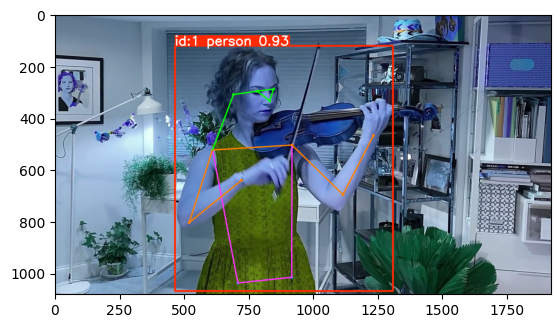

In [16]:
import matplotlib.pyplot as plt

plt.imshow(track_results[100].plot());

In [17]:
import numpy as np

#hand1 = np.stack([tr.keypoints.xy[0][9,:] for tr in track_results[9::]], axis=0)
#hand2 = np.stack([tr.keypoints.xy[0][10,:] for tr in track_results[10::]], axis=0)

# Alternativer Code mit Verwendung eines try-Blocks, 
# um Fehler abzufangen und nur erfolgreiche Einträge zu speichern:
hand1, hand2 = [], []
for tr in track_results:
    try:
        hand1.append(tr.keypoints.xy[0][9, :])
        hand2.append(tr.keypoints.xy[0][10, :])
    except IndexError:
        print("Skipping entry due to insufficient keypoints.")
hand1 = np.stack(hand1, axis=0)
hand2 = np.stack(hand2, axis=0)


Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.
Skipping entry due to insufficient keypoints.


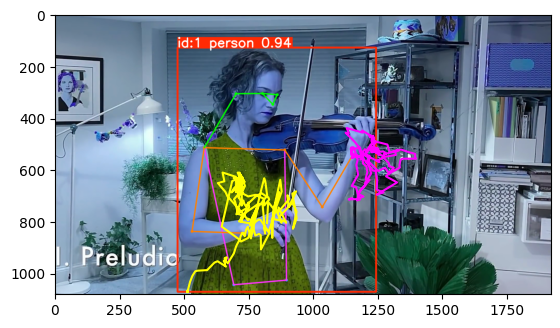

In [18]:
plt.imshow(track_results[51].plot())
plt.plot(hand1[:,0], hand1[:,1], 'magenta')
plt.plot(hand2[:,0], hand2[:,1], 'yellow');

We export the traces for later re-use:

In [19]:
import pandas as pd
pd.DataFrame(hand1).to_csv('hand1.csv', index=False)
pd.DataFrame(hand2).to_csv('hand2.csv', index=False)

## Back to generative art

Now we can go back to the ideas developed earlier in generative art: having coordinates of the violonist's hands, we can use that to generate some images. Here we'll group positions by three and create sequences of coloured triangles:

In [20]:
import turtle
import pandas as pd
import numpy as np

We reimport the data if necessary:

In [21]:
hand1 = pd.read_csv('hand1.csv').values
hand2 = pd.read_csv('hand2.csv').values

We center the position so that it's easier to handle on the canvas:

In [22]:
hand_mean = 0.5 * (hand1.mean(axis=0) +  hand2.mean(axis=0))
hand1 = hand1 - hand_mean
hand2 = hand2 - hand_mean

We initialize the drawing:

In [23]:
turtle.clearscreen()
turtle.screensize(canvwidth=600, canvheight=400)
turtle.tracer(0)

t = turtle.Turtle()
t.penup()
t.goto(hand1[0,0], hand1[0,1])
t.pendown()
t.showturtle()
t.pencolor((1,0,0))

We group points in steps of three and draw polygons of changing colours:

In [24]:
steps = 3
for i in np.arange(0,180,steps):
    t.begin_fill()
    t.fillcolor(np.random.randint(0,255,3)/255)
    t.begin_poly()
    for j in range(steps):
        t.goto(hand1[i+j,:]/1.5)
    t.end_fill()
    t.end_poly()
for i in np.arange(0,180,steps):
    t.begin_fill()
    t.fillcolor(np.random.randint(0,255,3)/255)
    t.begin_poly()
    for j in range(steps):
        t.goto(hand2[i+j,:]/1.5)
    t.end_fill()
    t.end_poly()
turtle.update()

Finally we save and display the image:

In [25]:
from PIL import Image

screen = turtle.Screen()
screen.getcanvas().postscript(file="output/hand_drawing.eps")
 
im = Image.open('output/hand_drawing.eps')
im.load(scale=4)  
im.save('output/hand_drawing.png')

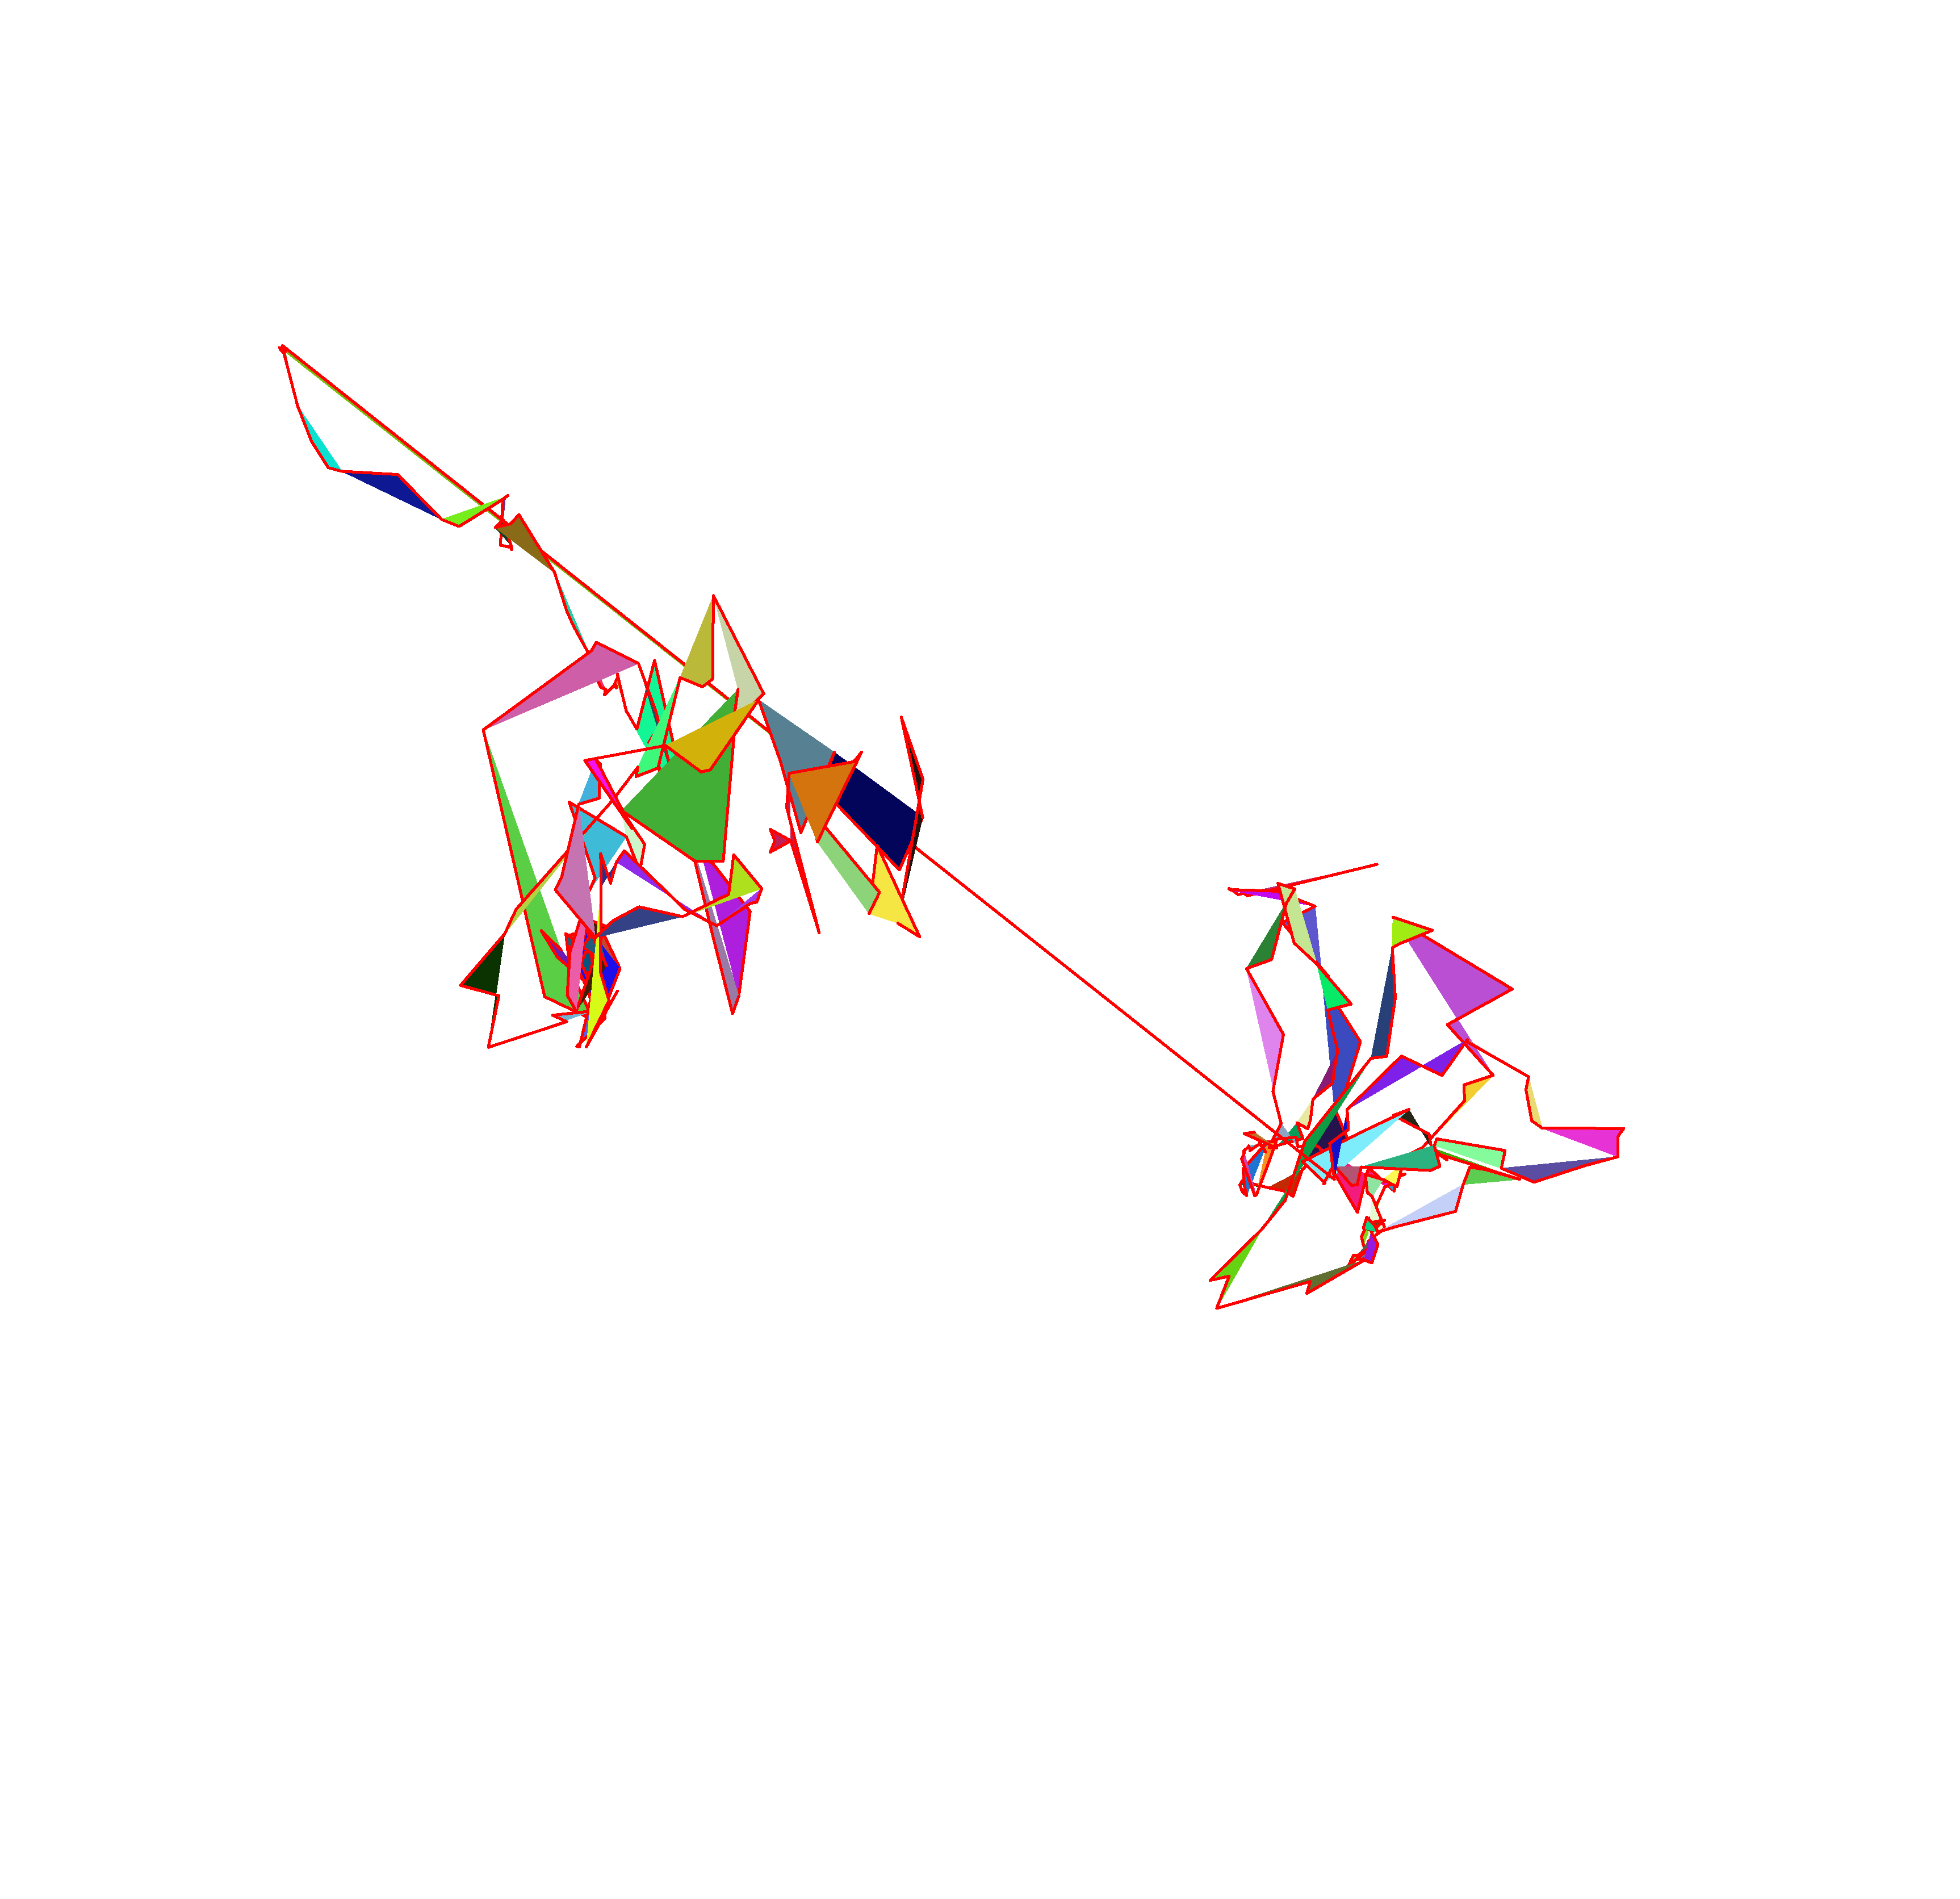

In [26]:
im